## 3. Неявный метод (Хаммера-Холлинсворта)

### 3.1. Уравнение Ван-дер-Поля

а) Уравнение Ван-дер-Поля:

\begin{equation*}
 \begin{cases}
   \frac{dy_1}{dt} = -a (\frac{y_{1}^3}{3} - y_1) - a y_2 = f(y_1, y_2),\\
   \frac{dy_2}{dt} = -y_1 = g(y_1, y_2).
 \end{cases}
\end{equation*}

Неявный метод (Хаммера-Холлинсворта) задаётся таблицей Бутчера:

| <img width=70/> | <img width=70/> | <img width=70/> |
| --- | --- | --- |
| $\frac{1}{2} - \frac{\sqrt{3}}{6}$ | $\frac{1}{4}$ | $\frac{1}{4} - \frac{\sqrt{3}}{6}$ |
| $\frac{1}{2} + \frac{\sqrt{3}}{6}$ | $\frac{1}{4} + \frac{\sqrt{3}}{6}$ | $\frac{1}{4}$ |
| <span> | 1/2 | 1/2 |

Неявная схема Рунге-Кутта 4-го порядка для уравнения $y' = f(x, y)$ примет вид:

\begin{equation*}
 y_{k+1} = y_k + \tau (\frac{k_1}{2} + \frac{k_2}{2}), \; где:\\
 k_1 = f(x_k + \tau (1/2 - \sqrt{3}/6), \; y_k + \tau (1/4 k_1 + (1/4 - \sqrt{3}/6) k_2);\\
 k_2 = f(x_k + \tau (1/2 + \sqrt{3}/6), \; y_k + \tau ((1/4 + \sqrt{3}/6) k_1 + 1/4 k_2)).
\end{equation*}

Имея определённую функцию $f(x, y)$, будем выражать столбец для $k$. Для уравнения Ван-дер-Поля ($f(y_1, y_2)$) имеем, заменив $x = y_1 = u, \: y = y_2 = v$:

\begin{equation*}
 k_1 = -a(\frac{(u + \tau (\frac{1}{2} - \frac{\sqrt{3}}{6}))^3}{3} - (u + \tau (\frac{1}{2} - \frac{\sqrt{3}}{6}))) - a(v + \frac{1}{4}k_1 + (\frac{1}{4} - \frac{\sqrt{3}}{6})k_2);\\
 k_2 = -a(\frac{(u + \tau (\frac{1}{2} + \frac{\sqrt{3}}{6}))^3}{3} - (u + \tau (\frac{1}{2} + \frac{\sqrt{3}}{6}))) - a(v + (\frac{1}{4} + \frac{\sqrt{3}}{6})k_1 + \frac{1}{4}k_2);
\end{equation*}

\begin{equation*}
 A \cdot k = B =>
\end{equation*}

\begin{equation*}
 \begin{pmatrix}
  1+\frac{a}{4} & a(\frac{1}{4}-\frac{\sqrt{3}}{6})\\
  a(\frac{1}{4}+\frac{\sqrt{3}}{6}) & 1+\frac{a}{4}
 \end{pmatrix} \cdot \begin{pmatrix}
  k_1\\
  k_2
 \end{pmatrix} = \begin{pmatrix}
  -a(\frac{(u + \tau (\frac{1}{2} - \frac{\sqrt{3}}{6}))^3}{3} - (u + \tau (\frac{1}{2} - \frac{\sqrt{3}}{6}))) - av\\
  -a(\frac{(u + \tau (\frac{1}{2} + \frac{\sqrt{3}}{6}))^3}{3} - (u + \tau (\frac{1}{2} + \frac{\sqrt{3}}{6}))) - av
 \end{pmatrix}.
\end{equation*}

Получили искомые формулы решения системы. То есть на $k-$том шаге имеем выражения для $k_1, \: k_2$ => сможем вычислить $v_{k+1} = y_{k+1}$.

Для $g(y_1, y_2)$ сразу имеем:

\begin{equation*}
 \begin{cases}
  k_1 = -u - \tau (\frac{1}{2} - \frac{\sqrt{3}}{6}));\\
  k_2 = -u - \tau (\frac{1}{2} + \frac{\sqrt{3}}{6})).
 \end{cases}
\end{equation*}

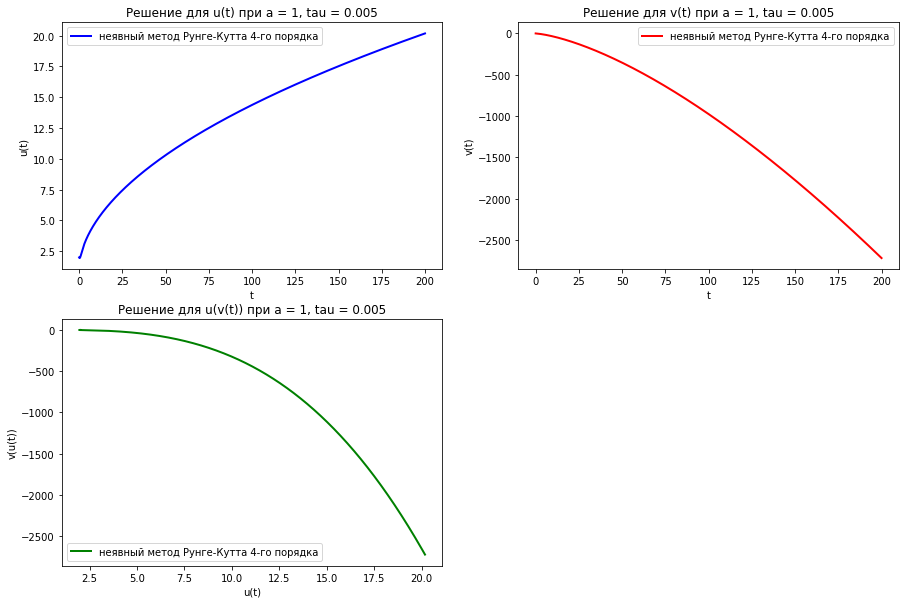

In [1]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
import math

# drawing improvements
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 15 #width
fig_size[1] = 5*2 #height
plt.rcParams["figure.figsize"] = fig_size

# constants
t_min = 0
t_max = 200

# variables
a = 1
tau = 5*10**-3  # use only tau <= 5*10**-3 when a = 1 otherwise overflow error!

N = int((t_max - t_min) / tau)

u = np.zeros(N)
v = np.zeros(N)

u[0] = 2
v[0] = 0

for i in range(0, N-1):
    A = np.array([[1 + a/4, a*(1/4 - math.sqrt(3)/6)],
                  [a*(1/4 + math.sqrt(3)/6), 1 + a/4]])
    B = np.array([-a*((u[i]+tau*(1/2 - math.sqrt(3)/6))**3 / 3 - (u[i]+tau*(1/2 - math.sqrt(3)/6))) - a*v[i],
                  -a*((u[i]+tau*(1/2 + math.sqrt(3)/6))**3 / 3 - (u[i]+tau*(1/2 + math.sqrt(3)/6))) - a*v[i]])
    k = np.linalg.solve(A, B)  # решаем данную систему
    k_1 = k[0]
    k_2 = k[1]
    u[i+1] = u[i] + tau*(k_1/2 + k_2/2)
    
    k_1 = -u[i] - tau*(1/2 - math.sqrt(3)/6)
    k_2 = -u[i] - tau*(1/2 + math.sqrt(3)/6)
    v[i+1] = v[i] + tau*(k_1/2 + k_2/2)

t = np.linspace(t_min, t_max, num=N)

ax = plt.subplot(2,2,1)
plt.plot(t, u, color='blue', label='неявный метод Рунге-Кутта 4-го порядка', linewidth=2.0)
ax.set_title(f"Решение для u(t) при a = {a}, tau = {tau}")
ax.set_xlabel('t')
ax.set_ylabel('u(t)')
ax.legend()

ax = plt.subplot(2,2,2)
plt.plot(t, v, color='red', label='неявный метод Рунге-Кутта 4-го порядка', linewidth=2.0)
ax.set_title(f"Решение для v(t) при a = {a}, tau = {tau}")
ax.set_xlabel('t')
ax.set_ylabel('v(t)')
ax.legend()

ax = plt.subplot(2,2,3)
plt.plot(u, v, color='green', label='неявный метод Рунге-Кутта 4-го порядка', linewidth=2.0)
ax.set_title(f"Решение для u(v(t)) при a = {a}, tau = {tau}")
ax.set_xlabel('u(t)')
ax.set_ylabel('v(u(t))')
ax.legend()


plt.savefig('images/a/3.1.main.png')

#### Графики решений при различных $a$

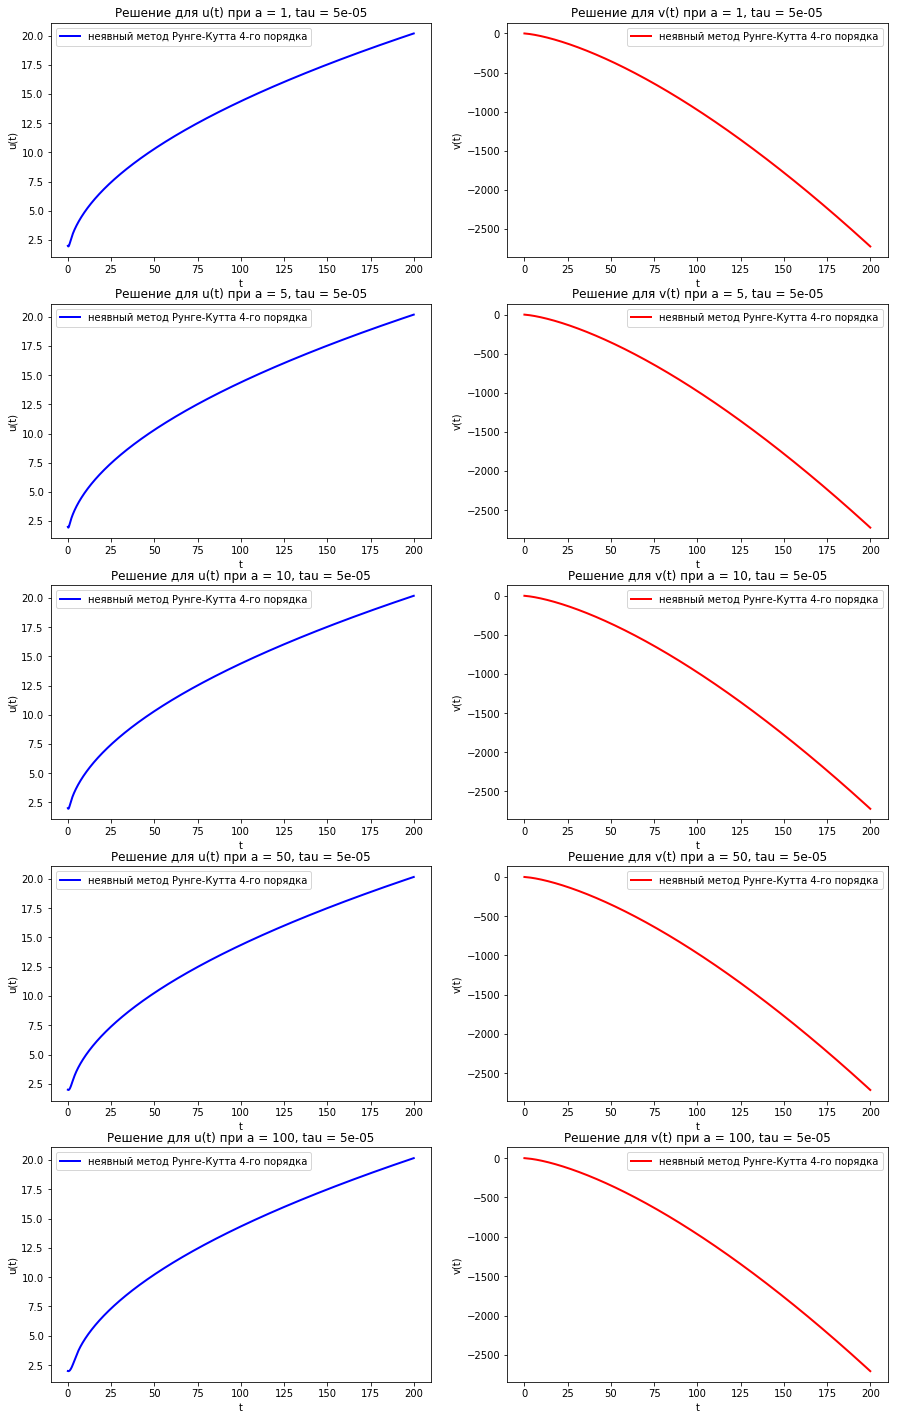

In [16]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
import math

# Different aas
aas = [10**0, 5*10**0, 10**1, 5*10**1, 10**2]

len_aas = len(aas)

# drawing improvements
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 15 #width
fig_size[1] = 5*len_aas #height
plt.rcParams["figure.figsize"] = fig_size

# constants
t_min = 0
t_max = 200

# variables
tau = 5*10**-5  # use only tau <= 5*10**-3 otherwise overflow error!

cycles = 1
for a in aas:
    N = int((t_max - t_min) / tau)

    u = np.zeros(N)
    v = np.zeros(N)

    u[0] = 2
    v[0] = 0

    for i in range(0, N-1):
        A = np.array([[1 + a/4, a*(1/4 - math.sqrt(3)/6)],
                      [a*(1/4 + math.sqrt(3)/6), 1 + a/4]])
        B = np.array([-a*((u[i]+tau*(1/2 - math.sqrt(3)/6))**3 / 3 - (u[i]+tau*(1/2 - math.sqrt(3)/6))) - a*v[i],
                      -a*((u[i]+tau*(1/2 + math.sqrt(3)/6))**3 / 3 - (u[i]+tau*(1/2 + math.sqrt(3)/6))) - a*v[i]])
        k = np.linalg.solve(A, B)  # решаем данную систему
        k_1 = k[0]
        k_2 = k[1]
        u[i+1] = u[i] + tau*(k_1/2 + k_2/2)

        k_1 = -u[i] - tau*(1/2 - math.sqrt(3)/6)
        k_2 = -u[i] - tau*(1/2 + math.sqrt(3)/6)
        v[i+1] = v[i] + tau*(k_1/2 + k_2/2)

    t = np.linspace(t_min, t_max, num=N)

    ax = plt.subplot(len_aas,2,cycles)
    plt.plot(t, u, color='blue', label='неявный метод Рунге-Кутта 4-го порядка', linewidth=2.0)
    ax.set_title(f"Решение для u(t) при a = {a}, tau = {tau}")
    ax.set_xlabel('t')
    ax.set_ylabel('u(t)')
    ax.legend()

    ax = plt.subplot(len_aas,2,cycles+1)
    plt.plot(t, v, color='red', label='неявный метод Рунге-Кутта 4-го порядка', linewidth=2.0)
    ax.set_title(f"Решение для v(t) при a = {a}, tau = {tau}")
    ax.set_xlabel('t')
    ax.set_ylabel('v(t)')
    ax.legend()

    cycles += 2

plt.savefig('images/a/3.2.a.png')

#### Графики решений при различных $\tau$

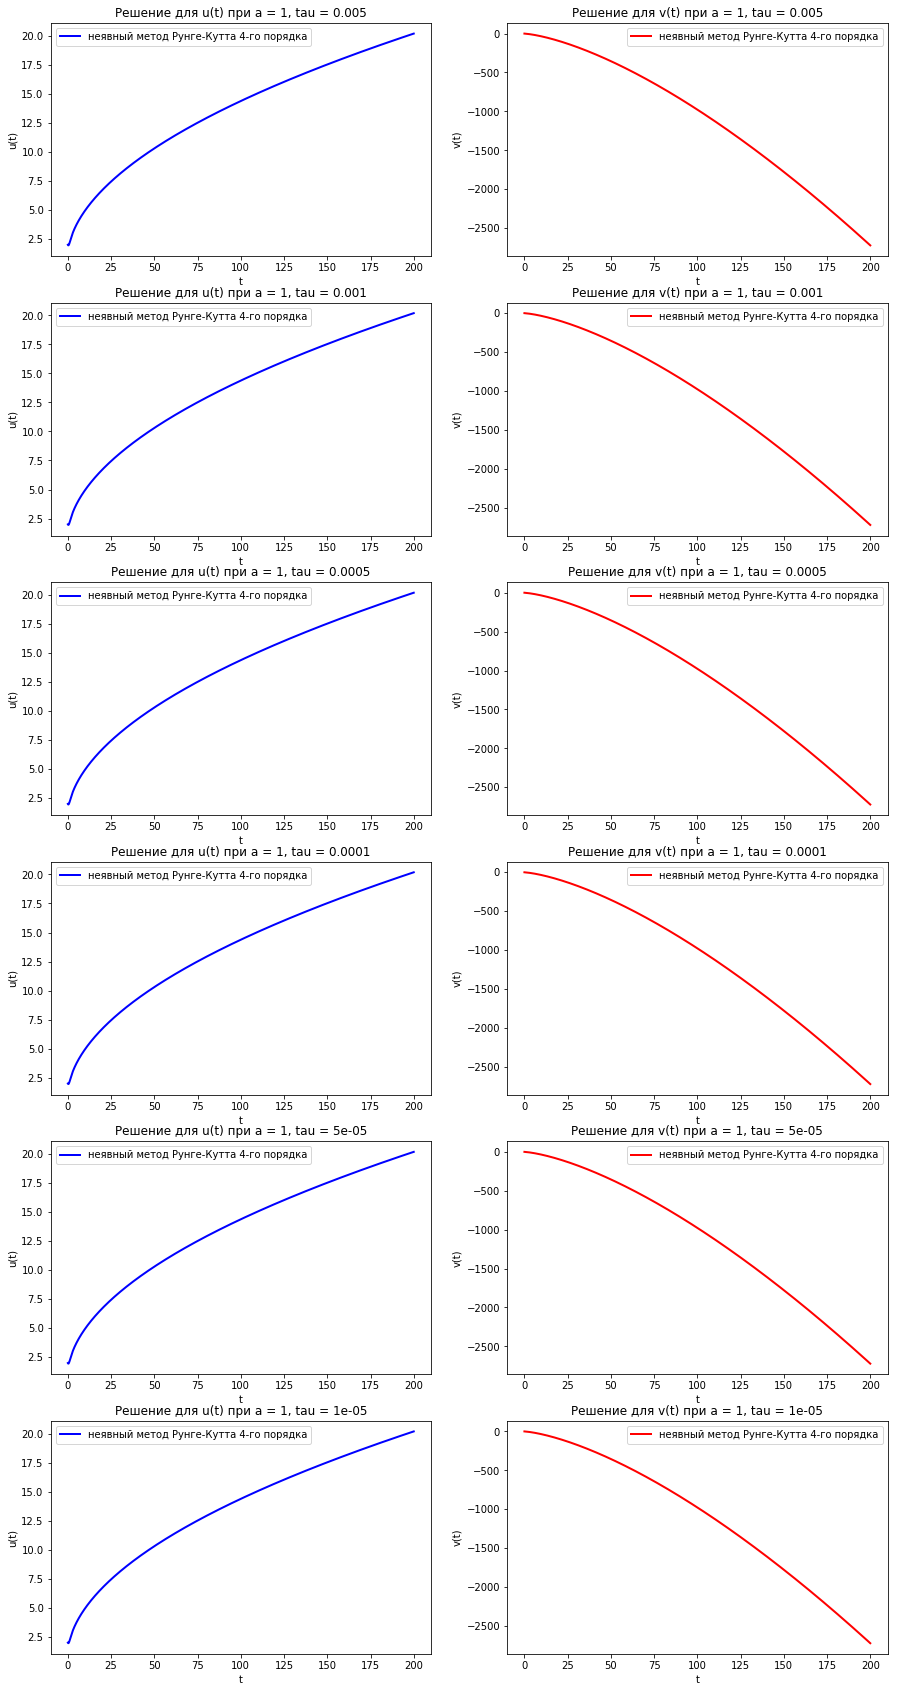

In [17]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
import math

# Different taus
taus = [5*10**-3, 10**-3, 5*10**-4, 10**-4, 5*10**-5, 10**-5]  # use only tau <= 5*10**-3 when a = 1 otherwise overflow error!

len_taus = len(taus)

# drawing improvements
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 15 #width
fig_size[1] = 5*len_taus #height
plt.rcParams["figure.figsize"] = fig_size

# constants
t_min = 0
t_max = 200

# variables
a = 1

cycles = 1
for tau in taus:
    N = int((t_max - t_min) / tau)

    u = np.zeros(N)
    v = np.zeros(N)

    u[0] = 2
    v[0] = 0

    for i in range(0, N-1):
        A = np.array([[1 + a/4, a*(1/4 - math.sqrt(3)/6)],
                      [a*(1/4 + math.sqrt(3)/6), 1 + a/4]])
        B = np.array([-a*((u[i]+tau*(1/2 - math.sqrt(3)/6))**3 / 3 - (u[i]+tau*(1/2 - math.sqrt(3)/6))) - a*v[i],
                      -a*((u[i]+tau*(1/2 + math.sqrt(3)/6))**3 / 3 - (u[i]+tau*(1/2 + math.sqrt(3)/6))) - a*v[i]])
        k = np.linalg.solve(A, B)  # решаем данную систему
        k_1 = k[0]
        k_2 = k[1]
        u[i+1] = u[i] + tau*(k_1/2 + k_2/2)

        k_1 = -u[i] - tau*(1/2 - math.sqrt(3)/6)
        k_2 = -u[i] - tau*(1/2 + math.sqrt(3)/6)
        v[i+1] = v[i] + tau*(k_1/2 + k_2/2)

    t = np.linspace(t_min, t_max, num=N)

    ax = plt.subplot(len_taus,2,cycles)
    plt.plot(t, u, color='blue', label='неявный метод Рунге-Кутта 4-го порядка', linewidth=2.0)
    ax.set_title(f"Решение для u(t) при a = {a}, tau = {tau}")
    ax.set_xlabel('t')
    ax.set_ylabel('u(t)')
    ax.legend()

    ax = plt.subplot(len_taus,2,cycles+1)
    plt.plot(t, v, color='red', label='неявный метод Рунге-Кутта 4-го порядка', linewidth=2.0)
    ax.set_title(f"Решение для v(t) при a = {a}, tau = {tau}")
    ax.set_xlabel('t')
    ax.set_ylabel('v(t)')
    ax.legend()

    cycles += 2

plt.savefig('images/a/3.3.tau.png')

## 3.2. Уравнение Бонгоффера – Ван-дер-Поля

б) Уравнение Бонгоффера – Ван-дер-Поля:

\begin{equation*}
 \begin{cases}
   \frac{dy_1}{dt} = -a (\frac{y_{1}^3}{3} - y_1) + a y_2,\\
   \frac{dy_2}{dt} = -y_1 - b y_2 + c.
 \end{cases}
\end{equation*}

Неявная схема Рунге-Кутта 4-го порядка для уравнения $y' = f(x, y)$ примет вид:

\begin{equation*}
 y_{k+1} = y_k + \tau (\frac{k_1}{2} + \frac{k_2}{2}), \; где:\\
 k_1 = f(x_k + \tau (1/2 - \sqrt{3}/6), \; y_k + \tau (1/4 k_1 + (1/4 - \sqrt{3}/6) k_2);\\
 k_2 = f(x_k + \tau (1/2 + \sqrt{3}/6), \; y_k + \tau ((1/4 + \sqrt{3}/6) k_1 + 1/4 k_2)).
\end{equation*}

Имея определённую функцию $f(x, y)$, будем выражать столбец для $k$. Для уравнения Ван-дер-Поля ($f(y_1, y_2)$) имеем, заменив $x = y_1 = u, \: y = y_2 = v$:

\begin{equation*}
 k_1 = -a(\frac{(u + \tau (\frac{1}{2} - \frac{\sqrt{3}}{6}))^3}{3} - (u + \tau (\frac{1}{2} - \frac{\sqrt{3}}{6}))) + a(v + \frac{1}{4}k_1 + (\frac{1}{4} - \frac{\sqrt{3}}{6})k_2);\\
 k_2 = -a(\frac{(u + \tau (\frac{1}{2} + \frac{\sqrt{3}}{6}))^3}{3} - (u + \tau (\frac{1}{2} + \frac{\sqrt{3}}{6}))) + a(v + (\frac{1}{4} + \frac{\sqrt{3}}{6})k_1 + \frac{1}{4}k_2);
\end{equation*}

\begin{equation*}
 A \cdot k = B =>
\end{equation*}

\begin{equation*}
 \begin{pmatrix}
  1-\frac{a}{4} & -a(\frac{1}{4}-\frac{\sqrt{3}}{6})\\
  -a(\frac{1}{4}+\frac{\sqrt{3}}{6}) & 1-\frac{a}{4}
 \end{pmatrix} \cdot \begin{pmatrix}
  k_1\\
  k_2
 \end{pmatrix} = \begin{pmatrix}
  -a(\frac{(u + \tau (\frac{1}{2} - \frac{\sqrt{3}}{6}))^3}{3} - (u + \tau (\frac{1}{2} - \frac{\sqrt{3}}{6}))) + av\\
  -a(\frac{(u + \tau (\frac{1}{2} + \frac{\sqrt{3}}{6}))^3}{3} - (u + \tau (\frac{1}{2} + \frac{\sqrt{3}}{6}))) + av
 \end{pmatrix}.
\end{equation*}

Получили искомые формулы решения системы. То есть на $k-$том шаге имеем выражения для $k_1, \: k_2$ => сможем вычислить $v_{k+1} = y_{k+1}$.

Для $g(y_1, y_2)$ аналогично имеем:

\begin{equation*}
 k_1 = -u - \tau (\frac{1}{2} - \frac{\sqrt{3}}{6})) - b(v + \tau (\frac{1}{4}k_1 + (\frac{1}{4} - \frac{\sqrt{3}}{6})k_2))+c;\\
 k_2 = -u - \tau (\frac{1}{2} + \frac{\sqrt{3}}{6})) - b(v + \tau ((\frac{1}{4} + \frac{\sqrt{3}}{6})k_1 + \frac{1}{4}k_2))+c.
\end{equation*}

\begin{equation*}
 A \cdot k = B =>
\end{equation*}

\begin{equation*}
 \begin{pmatrix}
  1+\frac{1}{4}b\tau & b\tau(\frac{1}{4}-\frac{\sqrt{3}}{6})\\
  b\tau(\frac{1}{4}+\frac{\sqrt{3}}{6}) & 1+\frac{1}{4}b\tau
 \end{pmatrix} \cdot \begin{pmatrix}
  k_1\\
  k_2
 \end{pmatrix} = \begin{pmatrix}
  -u - \tau (\frac{1}{2} - \frac{\sqrt{3}}{6}) -bv + c\\
  -u - \tau (\frac{1}{2} + \frac{\sqrt{3}}{6}) -bv + c
 \end{pmatrix}.
\end{equation*}

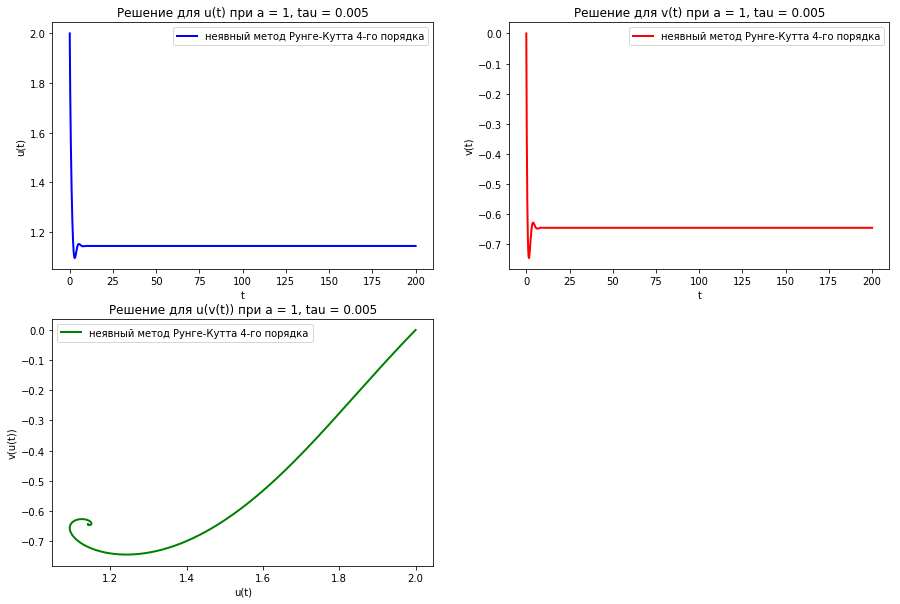

In [18]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
import math

# drawing improvements
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 15 #width
fig_size[1] = 5*2 #height
plt.rcParams["figure.figsize"] = fig_size

# constants
t_min = 0
t_max = 200

# variables
a = 1
b = 1
c = 0.5
tau = 5*10**-3  # use only tau <= 5*10**-3 when a = 1 otherwise overflow error!

N = int((t_max - t_min) / tau)

u = np.zeros(N)
v = np.zeros(N)

u[0] = 2
v[0] = 0

for i in range(0, N-1):
    A = np.array([[1 - a/4, -a*(1/4 - math.sqrt(3)/6)],
                  [-a*(1/4 + math.sqrt(3)/6), 1 - a/4]])
    B = np.array([-a*((u[i]+tau*(1/2 - math.sqrt(3)/6))**3 / 3 - (u[i]+tau*(1/2 - math.sqrt(3)/6))) + a*v[i],
                  -a*((u[i]+tau*(1/2 + math.sqrt(3)/6))**3 / 3 - (u[i]+tau*(1/2 + math.sqrt(3)/6))) + a*v[i]])
    k = np.linalg.solve(A, B)  # решаем данную систему
    k_1 = k[0]
    k_2 = k[1]
    u[i+1] = u[i] + tau*(k_1/2 + k_2/2)
    
    A = np.array([[1 + b*tau/4, b*tau*(1/4 - math.sqrt(3)/6)],
                  [b*tau*(1/4 + math.sqrt(3)/6), 1 + b*tau/4]])
    B = np.array([-u[i]-tau*(1/2 - math.sqrt(3)/6)-b*v[i]+c,
                  -u[i]-tau*(1/2 + math.sqrt(3)/6)-b*v[i]+c])
    k = np.linalg.solve(A, B)  # решаем данную систему
    k_1 = k[0]
    k_2 = k[1]
    v[i+1] = v[i] + tau*(k_1/2 + k_2/2)

t = np.linspace(t_min, t_max, num=N)

ax = plt.subplot(2,2,1)
plt.plot(t, u, color='blue', label='неявный метод Рунге-Кутта 4-го порядка', linewidth=2.0)
ax.set_title(f"Решение для u(t) при a = {a}, tau = {tau}")
ax.set_xlabel('t')
ax.set_ylabel('u(t)')
ax.legend()

ax = plt.subplot(2,2,2)
plt.plot(t, v, color='red', label='неявный метод Рунге-Кутта 4-го порядка', linewidth=2.0)
ax.set_title(f"Решение для v(t) при a = {a}, tau = {tau}")
ax.set_xlabel('t')
ax.set_ylabel('v(t)')
ax.legend()

ax = plt.subplot(2,2,3)
plt.plot(u, v, color='green', label='неявный метод Рунге-Кутта 4-го порядка', linewidth=2.0)
ax.set_title(f"Решение для u(v(t)) при a = {a}, tau = {tau}")
ax.set_xlabel('u(t)')
ax.set_ylabel('v(u(t))')
ax.legend()


plt.savefig('images/b/3.1.main.png')

#### Графики решений при различных $a$

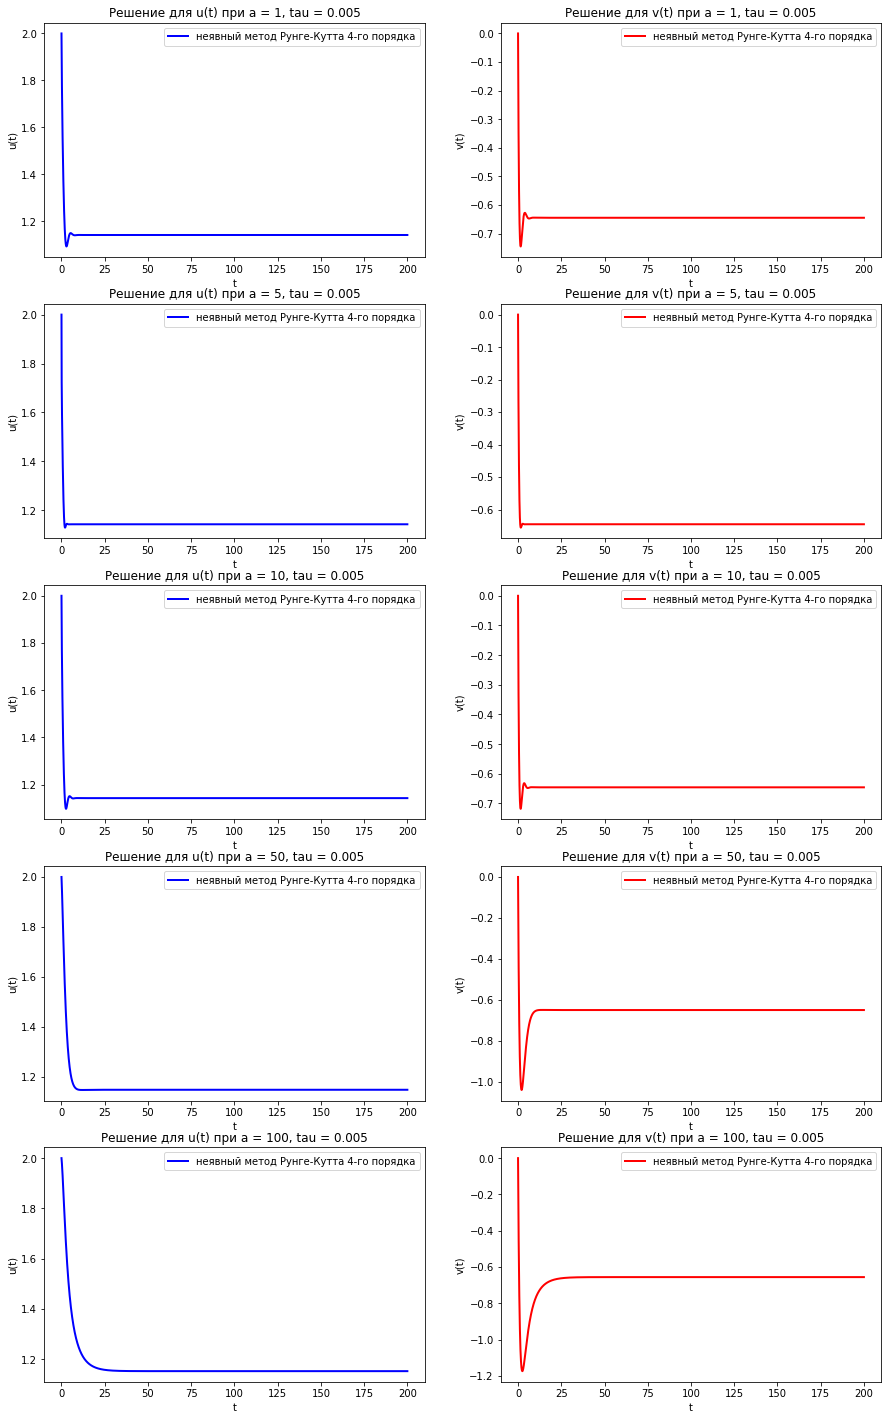

In [19]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
import math

# Different aas
aas = [10**0, 5*10**0, 10**1, 5*10**1, 10**2]

len_aas = len(aas)

# drawing improvements
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 15 #width
fig_size[1] = 5*len_aas #height
plt.rcParams["figure.figsize"] = fig_size

# constants
t_min = 0
t_max = 200

# variables
b = 1
c = 0.5
tau = 5*10**-3  # use only tau <= 5*10**-3 otherwise overflow error!

cycles = 1
for a in aas:
    N = int((t_max - t_min) / tau)

    u = np.zeros(N)
    v = np.zeros(N)

    u[0] = 2
    v[0] = 0
    
    for i in range(0, N-1):
        A = np.array([[1 - a/4, -a*(1/4 - math.sqrt(3)/6)],
                      [-a*(1/4 + math.sqrt(3)/6), 1 - a/4]])
        B = np.array([-a*((u[i]+tau*(1/2 - math.sqrt(3)/6))**3 / 3 - (u[i]+tau*(1/2 - math.sqrt(3)/6))) + a*v[i],
                      -a*((u[i]+tau*(1/2 + math.sqrt(3)/6))**3 / 3 - (u[i]+tau*(1/2 + math.sqrt(3)/6))) + a*v[i]])
        k = np.linalg.solve(A, B)  # решаем данную систему
        k_1 = k[0]
        k_2 = k[1]
        u[i+1] = u[i] + tau*(k_1/2 + k_2/2)

        A = np.array([[1 + b*tau/4, b*tau*(1/4 - math.sqrt(3)/6)],
                      [b*tau*(1/4 + math.sqrt(3)/6), 1 + b*tau/4]])
        B = np.array([-u[i]-tau*(1/2 - math.sqrt(3)/6)-b*v[i]+c,
                      -u[i]-tau*(1/2 + math.sqrt(3)/6)-b*v[i]+c])
        k = np.linalg.solve(A, B)  # решаем данную систему
        k_1 = k[0]
        k_2 = k[1]
        v[i+1] = v[i] + tau*(k_1/2 + k_2/2)

    t = np.linspace(t_min, t_max, num=N)

    ax = plt.subplot(len_aas,2,cycles)
    plt.plot(t, u, color='blue', label='неявный метод Рунге-Кутта 4-го порядка', linewidth=2.0)
    ax.set_title(f"Решение для u(t) при a = {a}, tau = {tau}")
    ax.set_xlabel('t')
    ax.set_ylabel('u(t)')
    ax.legend()

    ax = plt.subplot(len_aas,2,cycles+1)
    plt.plot(t, v, color='red', label='неявный метод Рунге-Кутта 4-го порядка', linewidth=2.0)
    ax.set_title(f"Решение для v(t) при a = {a}, tau = {tau}")
    ax.set_xlabel('t')
    ax.set_ylabel('v(t)')
    ax.legend()

    cycles += 2

plt.savefig('images/b/3.2.a.png')

#### Графики решений при различных $\tau$

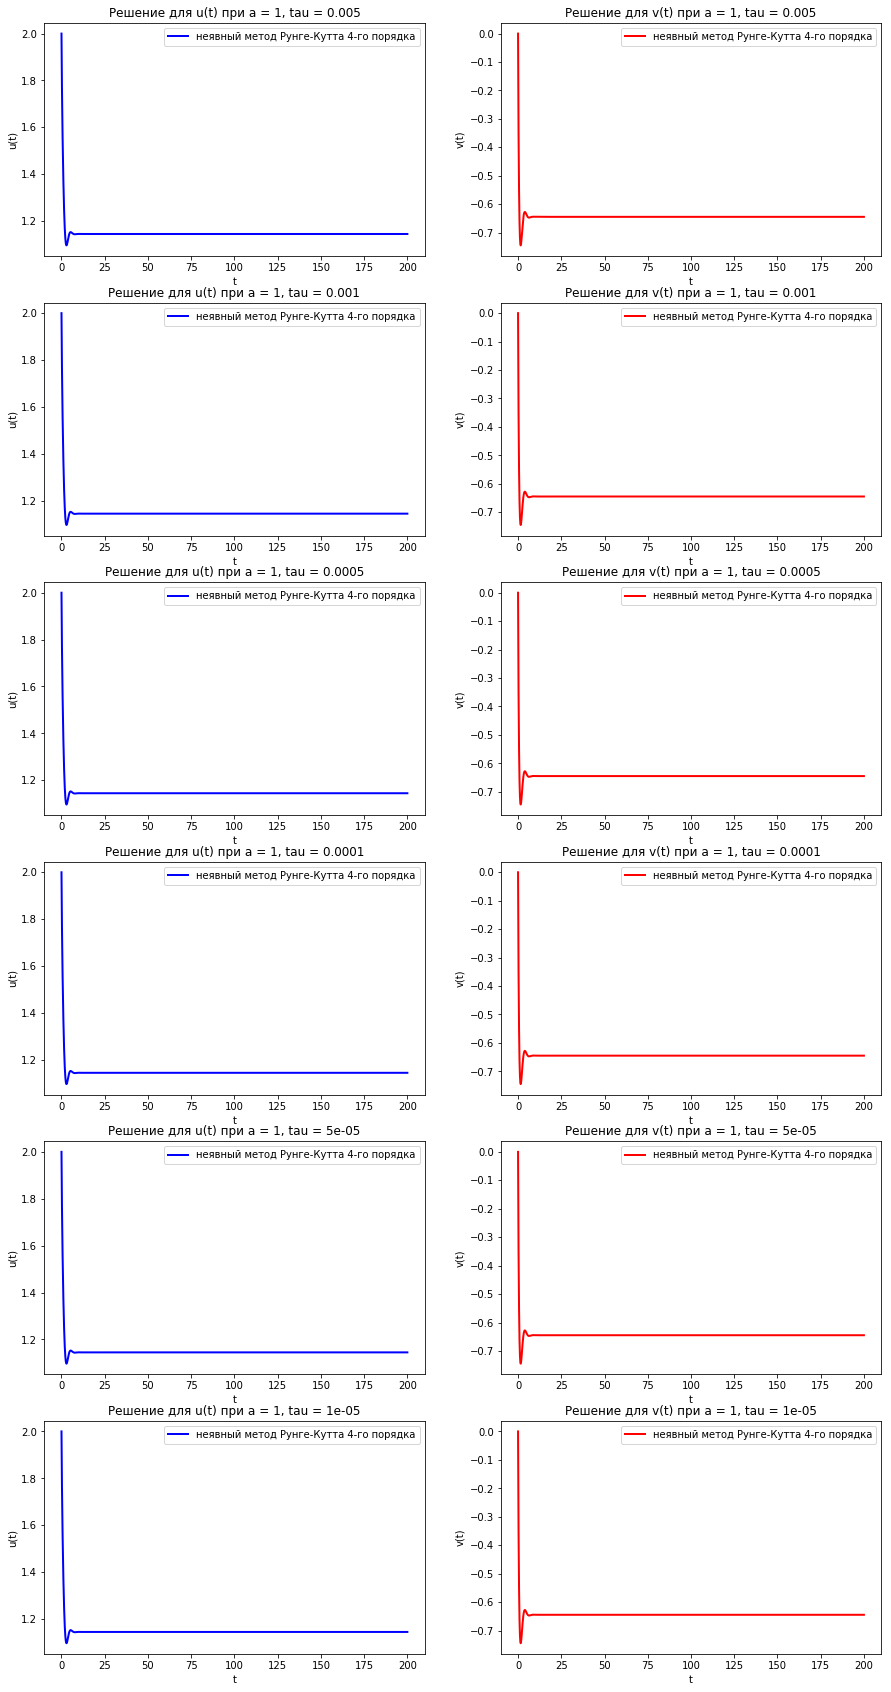

In [20]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
import math

# Different taus
taus = [5*10**-3, 10**-3, 5*10**-4, 10**-4, 5*10**-5, 10**-5]  # use only tau <= 5*10**-3 when a = 1 otherwise overflow error!

len_taus = len(taus)

# drawing improvements
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 15 #width
fig_size[1] = 5*len_taus #height
plt.rcParams["figure.figsize"] = fig_size

# constants
t_min = 0
t_max = 200

# variables
a = 1
b = 1
c = 0.5

cycles = 1
for tau in taus:
    N = int((t_max - t_min) / tau)

    u = np.zeros(N)
    v = np.zeros(N)

    u[0] = 2
    v[0] = 0

    for i in range(0, N-1):
        A = np.array([[1 - a/4, -a*(1/4 - math.sqrt(3)/6)],
                      [-a*(1/4 + math.sqrt(3)/6), 1 - a/4]])
        B = np.array([-a*((u[i]+tau*(1/2 - math.sqrt(3)/6))**3 / 3 - (u[i]+tau*(1/2 - math.sqrt(3)/6))) + a*v[i],
                      -a*((u[i]+tau*(1/2 + math.sqrt(3)/6))**3 / 3 - (u[i]+tau*(1/2 + math.sqrt(3)/6))) + a*v[i]])
        k = np.linalg.solve(A, B)  # решаем данную систему
        k_1 = k[0]
        k_2 = k[1]
        u[i+1] = u[i] + tau*(k_1/2 + k_2/2)

        A = np.array([[1 + b*tau/4, b*tau*(1/4 - math.sqrt(3)/6)],
                      [b*tau*(1/4 + math.sqrt(3)/6), 1 + b*tau/4]])
        B = np.array([-u[i]-tau*(1/2 - math.sqrt(3)/6)-b*v[i]+c,
                      -u[i]-tau*(1/2 + math.sqrt(3)/6)-b*v[i]+c])
        k = np.linalg.solve(A, B)  # решаем данную систему
        k_1 = k[0]
        k_2 = k[1]
        v[i+1] = v[i] + tau*(k_1/2 + k_2/2)

    t = np.linspace(t_min, t_max, num=N)

    ax = plt.subplot(len_taus,2,cycles)
    plt.plot(t, u, color='blue', label='неявный метод Рунге-Кутта 4-го порядка', linewidth=2.0)
    ax.set_title(f"Решение для u(t) при a = {a}, tau = {tau}")
    ax.set_xlabel('t')
    ax.set_ylabel('u(t)')
    ax.legend()

    ax = plt.subplot(len_taus,2,cycles+1)
    plt.plot(t, v, color='red', label='неявный метод Рунге-Кутта 4-го порядка', linewidth=2.0)
    ax.set_title(f"Решение для v(t) при a = {a}, tau = {tau}")
    ax.set_xlabel('t')
    ax.set_ylabel('v(t)')
    ax.legend()

    cycles += 2

plt.savefig('images/b/3.3.tau.png')

## 3.3. Неавтономное уравнение Ван-дер-Поля, траектория-«утка»

в) Неавтономное уравнение Ван-дер-Поля, траектория-«утка»:

\begin{equation*}
 \begin{cases}
   \frac{dy_1}{dt} = -a (\frac{y_{1}^3}{3} - y_1) + a y_2,\\
   \frac{dy_2}{dt} = -y_1 + A cos(\omega t).
 \end{cases}
\end{equation*}

Решаем аналогично 3.1.

Неявная схема Рунге-Кутта 4-го порядка для уравнения $y' = f(x, y)$ примет вид:

\begin{equation*}
 y_{k+1} = y_k + \tau (\frac{k_1}{2} + \frac{k_2}{2}), \; где:\\
 k_1 = f(x_k + \tau (1/2 - \sqrt{3}/6), \; y_k + \tau (1/4 k_1 + (1/4 - \sqrt{3}/6) k_2);\\
 k_2 = f(x_k + \tau (1/2 + \sqrt{3}/6), \; y_k + \tau ((1/4 + \sqrt{3}/6) k_1 + 1/4 k_2)).
\end{equation*}

Имея определённую функцию $f(x, y)$, будем выражать столбец для $k$. Для уравнения Ван-дер-Поля ($f(y_1, y_2)$) имеем, заменив $x = y_1 = u, \: y = y_2 = v$:

\begin{equation*}
 k_1 = -a(\frac{(u + \tau (\frac{1}{2} - \frac{\sqrt{3}}{6}))^3}{3} - (u + \tau (\frac{1}{2} - \frac{\sqrt{3}}{6}))) + a(v + \frac{1}{4}k_1 + (\frac{1}{4} - \frac{\sqrt{3}}{6})k_2);\\
 k_2 = -a(\frac{(u + \tau (\frac{1}{2} + \frac{\sqrt{3}}{6}))^3}{3} - (u + \tau (\frac{1}{2} + \frac{\sqrt{3}}{6}))) + a(v + (\frac{1}{4} + \frac{\sqrt{3}}{6})k_1 + \frac{1}{4}k_2);
\end{equation*}

\begin{equation*}
 H \cdot k = B =>
\end{equation*}

\begin{equation*}
 \begin{pmatrix}
  1+\frac{a}{4} & a(\frac{1}{4}-\frac{\sqrt{3}}{6})\\
  a(\frac{1}{4}+\frac{\sqrt{3}}{6}) & 1+\frac{a}{4}
 \end{pmatrix} \cdot \begin{pmatrix}
  k_1\\
  k_2
 \end{pmatrix} = \begin{pmatrix}
  -a(\frac{(u + \tau (\frac{1}{2} - \frac{\sqrt{3}}{6}))^3}{3} - (u + \tau (\frac{1}{2} - \frac{\sqrt{3}}{6}))) + av\\
  -a(\frac{(u + \tau (\frac{1}{2} + \frac{\sqrt{3}}{6}))^3}{3} - (u + \tau (\frac{1}{2} + \frac{\sqrt{3}}{6}))) + av
 \end{pmatrix}.
\end{equation*}

Получили искомые формулы решения системы. То есть на $k-$том шаге имеем выражения для $k_1, \: k_2$ => сможем вычислить $v_{k+1} = y_{k+1}$.

Для $g(y_1, y_2)$ сразу имеем:

\begin{equation*}
 \begin{cases}
  k_1 = -u - \tau (\frac{1}{2} - \frac{\sqrt{3}}{6})) + A cos(\omega t);\\
  k_2 = -u - \tau (\frac{1}{2} + \frac{\sqrt{3}}{6})) + A cos(\omega t).
 \end{cases}
\end{equation*}

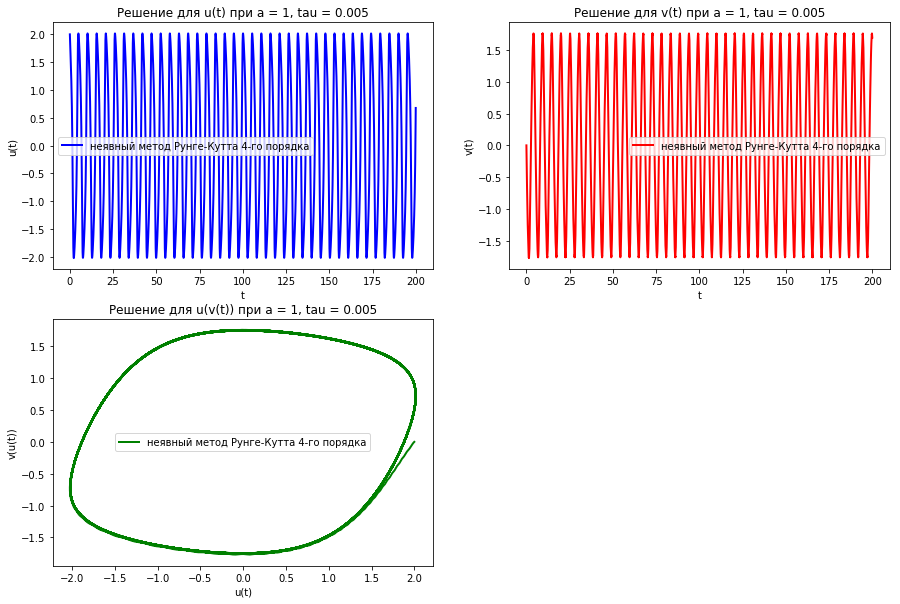

In [21]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
import math

# drawing improvements
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 15 #width
fig_size[1] = 5*2 #height
plt.rcParams["figure.figsize"] = fig_size

# constants
t_min = 0
t_max = 200

# variables
a = 1
A = 0.5
omega = 100
tau = 5*10**-3  # use only tau <= 5*10**-3 when a = 1 otherwise overflow error!

N = int((t_max - t_min) / tau)

u = np.zeros(N)
v = np.zeros(N)

u[0] = 2
v[0] = 0

for i in range(0, N-1):
    t = (i + 1) * tau
    
    H = np.array([[1 - a/4, -a*(1/4 - math.sqrt(3)/6)],
                  [-a*(1/4 + math.sqrt(3)/6), 1 - a/4]])
    B = np.array([-a*((u[i]+tau*(1/2 - math.sqrt(3)/6))**3 / 3 - (u[i]+tau*(1/2 - math.sqrt(3)/6))) + a*v[i],
                  -a*((u[i]+tau*(1/2 + math.sqrt(3)/6))**3 / 3 - (u[i]+tau*(1/2 + math.sqrt(3)/6))) + a*v[i]])
    k = np.linalg.solve(H, B)  # решаем данную систему
    k_1 = k[0]
    k_2 = k[1]
    u[i+1] = u[i] + tau*(k_1/2 + k_2/2)
    
    k_1 = -u[i] - tau*(1/2 - math.sqrt(3)/6) + A * math.cos(omega * t)
    k_2 = -u[i] - tau*(1/2 + math.sqrt(3)/6) + A * math.cos(omega * t)
    v[i+1] = v[i] + tau*(k_1 / 2 + k_2 / 2)

t = np.linspace(t_min, t_max, num=N)

ax = plt.subplot(2,2,1)
plt.plot(t, u, color='blue', label='неявный метод Рунге-Кутта 4-го порядка', linewidth=2.0)
ax.set_title(f"Решение для u(t) при a = {a}, tau = {tau}")
ax.set_xlabel('t')
ax.set_ylabel('u(t)')
ax.legend()

ax = plt.subplot(2,2,2)
plt.plot(t, v, color='red', label='неявный метод Рунге-Кутта 4-го порядка', linewidth=2.0)
ax.set_title(f"Решение для v(t) при a = {a}, tau = {tau}")
ax.set_xlabel('t')
ax.set_ylabel('v(t)')
ax.legend()

ax = plt.subplot(2,2,3)
plt.plot(u, v, color='green', label='неявный метод Рунге-Кутта 4-го порядка', linewidth=2.0)
ax.set_title(f"Решение для u(v(t)) при a = {a}, tau = {tau}")
ax.set_xlabel('u(t)')
ax.set_ylabel('v(u(t))')
ax.legend()


plt.savefig('images/c/3.1.main.png')

#### Графики решений при различных $\omega$

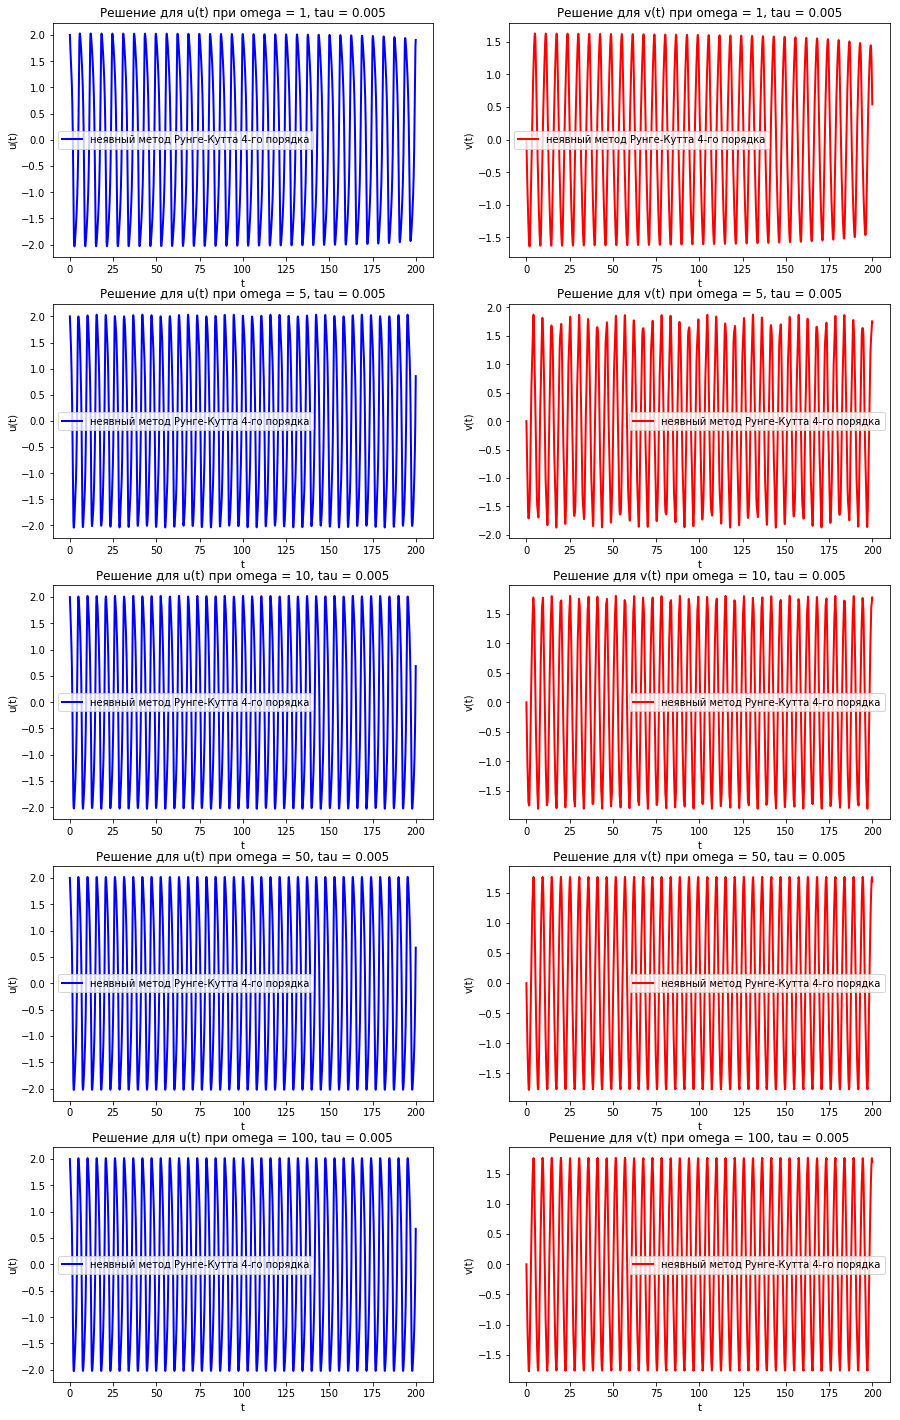

In [22]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
import math

# Different omegas
omegas = [10**0, 5*10**0, 10**1, 5*10**1, 10**2]

len_omegas = len(omegas)

# drawing improvements
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 15 #width
fig_size[1] = 5*len_omegas #height
plt.rcParams["figure.figsize"] = fig_size

# constants
t_min = 0
t_max = 200

# variables
a = 1
A = 0.5
tau = 5*10**-3  # use only tau <= 5*10**-3 otherwise overflow error!

cycles = 1
for omega in omegas:
    N = int((t_max - t_min) / tau)

    u = np.zeros(N)
    v = np.zeros(N)

    u[0] = 2
    v[0] = 0

    for i in range(0, N-1):
        t = (i + 1) * tau

        H = np.array([[1 - a/4, -a*(1/4 - math.sqrt(3)/6)],
                      [-a*(1/4 + math.sqrt(3)/6), 1 - a/4]])
        B = np.array([-a*((u[i]+tau*(1/2 - math.sqrt(3)/6))**3 / 3 - (u[i]+tau*(1/2 - math.sqrt(3)/6))) + a*v[i],
                      -a*((u[i]+tau*(1/2 + math.sqrt(3)/6))**3 / 3 - (u[i]+tau*(1/2 + math.sqrt(3)/6))) + a*v[i]])
        k = np.linalg.solve(H, B)  # решаем данную систему
        k_1 = k[0]
        k_2 = k[1]
        u[i+1] = u[i] + tau*(k_1/2 + k_2/2)

        k_1 = -u[i] - tau*(1/2 - math.sqrt(3)/6) + A * math.cos(omega * t)
        k_2 = -u[i] - tau*(1/2 + math.sqrt(3)/6) + A * math.cos(omega * t)
        v[i+1] = v[i] + tau*(k_1 / 2 + k_2 / 2)

    t = np.linspace(t_min, t_max, num=N)

    ax = plt.subplot(len_omegas,2,cycles)
    plt.plot(t, u, color='blue', label='неявный метод Рунге-Кутта 4-го порядка', linewidth=2.0)
    ax.set_title(f"Решение для u(t) при omega = {omega}, tau = {tau}")
    ax.set_xlabel('t')
    ax.set_ylabel('u(t)')
    ax.legend()

    ax = plt.subplot(len_omegas,2,cycles+1)
    plt.plot(t, v, color='red', label='неявный метод Рунге-Кутта 4-го порядка', linewidth=2.0)
    ax.set_title(f"Решение для v(t) при omega = {omega}, tau = {tau}")
    ax.set_xlabel('t')
    ax.set_ylabel('v(t)')
    ax.legend()

    cycles += 2

plt.savefig('images/c/3.2.omega.png')

#### Графики решений при различных $\tau$

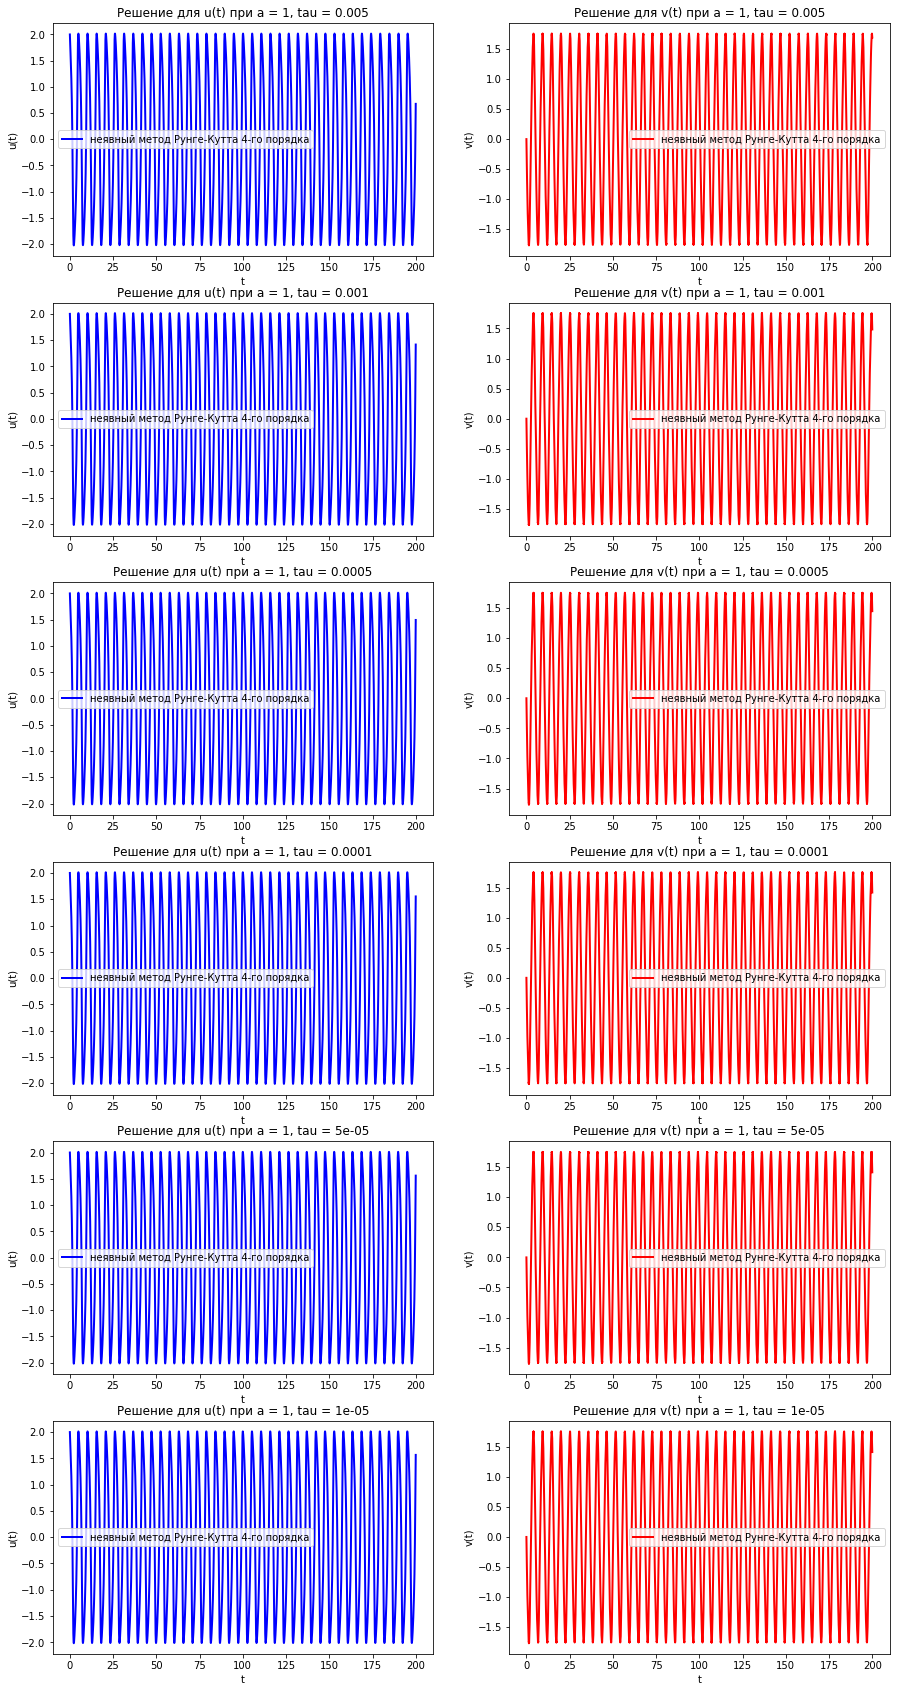

In [23]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
import math

# Different taus
taus = [5*10**-3, 10**-3, 5*10**-4, 10**-4, 5*10**-5, 10**-5]  # use only tau <= 5*10**-3 when a = 1 otherwise overflow error!

len_taus = len(taus)

# drawing improvements
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 15 #width
fig_size[1] = 5*len_taus #height
plt.rcParams["figure.figsize"] = fig_size

# constants
t_min = 0
t_max = 200

# variables
a = 1
A = 0.5
omega = 100

cycles = 1
for tau in taus:
    N = int((t_max - t_min) / tau)

    u = np.zeros(N)
    v = np.zeros(N)

    u[0] = 2
    v[0] = 0

    for i in range(0, N-1):
        t = (i + 1) * tau

        H = np.array([[1 - a/4, -a*(1/4 - math.sqrt(3)/6)],
                      [-a*(1/4 + math.sqrt(3)/6), 1 - a/4]])
        B = np.array([-a*((u[i]+tau*(1/2 - math.sqrt(3)/6))**3 / 3 - (u[i]+tau*(1/2 - math.sqrt(3)/6))) + a*v[i],
                      -a*((u[i]+tau*(1/2 + math.sqrt(3)/6))**3 / 3 - (u[i]+tau*(1/2 + math.sqrt(3)/6))) + a*v[i]])
        k = np.linalg.solve(H, B)  # решаем данную систему
        k_1 = k[0]
        k_2 = k[1]
        u[i+1] = u[i] + tau*(k_1/2 + k_2/2)

        k_1 = -u[i] - tau*(1/2 - math.sqrt(3)/6) + A * math.cos(omega * t)
        k_2 = -u[i] - tau*(1/2 + math.sqrt(3)/6) + A * math.cos(omega * t)
        v[i+1] = v[i] + tau*(k_1 / 2 + k_2 / 2)

    t = np.linspace(t_min, t_max, num=N)

    ax = plt.subplot(len_taus,2,cycles)
    plt.plot(t, u, color='blue', label='неявный метод Рунге-Кутта 4-го порядка', linewidth=2.0)
    ax.set_title(f"Решение для u(t) при a = {a}, tau = {tau}")
    ax.set_xlabel('t')
    ax.set_ylabel('u(t)')
    ax.legend()

    ax = plt.subplot(len_taus,2,cycles+1)
    plt.plot(t, v, color='red', label='неявный метод Рунге-Кутта 4-го порядка', linewidth=2.0)
    ax.set_title(f"Решение для v(t) при a = {a}, tau = {tau}")
    ax.set_xlabel('t')
    ax.set_ylabel('v(t)')
    ax.legend()

    cycles += 2

plt.savefig('images/c/3.3.tau.png')

## 3.4. Уравнение Рэлея

г) Уравнение Рэлея:

\begin{equation*}
 x'' - a (1 - {x'}^2)x' + x = 0.
\end{equation*}

Используем явный метод Эйлера:

\begin{equation*}
 u_{k+1} = u_k + \tau \cdot f(x_k, y_k).
\end{equation*}

Исходную систему можно преобразовать к виду:

\begin{equation*}
 \begin{cases}
   x' = y,\\
   y' = a (1-y^2)y - x.
 \end{cases}
\end{equation*}

Сделаем замену: $u = x, v = x'$, тогда имеем:

\begin{equation*}
 \begin{cases}
   u' = v,\\
   v' = a (1-v^2)v - u.
 \end{cases}
\end{equation*}

Неявная схема Рунге-Кутта 4-го порядка для уравнения $y' = f(x, y)$ примет вид:

\begin{equation*}
 y_{k+1} = y_k + \tau (\frac{k_1}{2} + \frac{k_2}{2}), \; где:\\
 k_1 = f(x_k + \tau (1/2 - \sqrt{3}/6), \; y_k + \tau (1/4 k_1 + (1/4 - \sqrt{3}/6) k_2);\\
 k_2 = f(x_k + \tau (1/2 + \sqrt{3}/6), \; y_k + \tau ((1/4 + \sqrt{3}/6) k_1 + 1/4 k_2)).
\end{equation*}

Имея определённую функцию $f(x, y)$, будем выражать столбец для $k$. Для уравнения Ван-дер-Поля ($f(y_1, y_2)$) имеем, заменив $x = y_1 = u, \: y = y_2 = v$:

\begin{equation*}
 k_1 = v + \tau(\frac{1}{4}k_1+(\frac{1}{4}-\frac{\sqrt{3}}{6})k_2);\\
 k_2 = v + \tau((\frac{1}{4}+\frac{\sqrt{3}}{6})k_1+\frac{1}{4}k_2);
\end{equation*}

\begin{equation*}
 A \cdot k = B =>
\end{equation*}

\begin{equation*}
 \begin{pmatrix}
  1+\frac{\tau}{4} & -\tau(\frac{1}{4}-\frac{\sqrt{3}}{6})\\
  -\tau(\frac{1}{4}+\frac{\sqrt{3}}{6}) & 1-\frac{\tau}{4}
 \end{pmatrix} \cdot \begin{pmatrix}
  k_1\\
  k_2
 \end{pmatrix} = \begin{pmatrix}
  v\\
  v
 \end{pmatrix}.
\end{equation*}

Получили искомые формулы решения системы. То есть на $k-$том шаге имеем выражения для $k_1, \: k_2$ => сможем вычислить $v_{k+1} = y_{k+1}$.

Для $g(u, v)$ имеем:

\begin{equation*}
 k_1 = a(1-(v+\tau(\frac{1}{4}k_1+(\frac{1}{4}-\frac{\sqrt{3}}{6})k_2))^2)\cdot(v+\tau(\frac{1}{4}k_1+(\frac{1}{4}-\frac{\sqrt{3}}{6})k_2))-u-\tau(\frac{1}{2}-\frac{\sqrt{3}}{6});\\
 k_2 = a(1-(v + \tau((\frac{1}{4}+\frac{\sqrt{3}}{6})k_1+\frac{1}{4}k_2))^2\cdot(v + \tau((\frac{1}{4}+\frac{\sqrt{3}}{6})k_1+\frac{1}{4}k_2))-u-\tau(\frac{1}{2}+\frac{\sqrt{3}}{6}).
\end{equation*}

Видно, что из последних двух равенств нельзя явно выразить $k_1, \: k_2$, так как они в кубической степени.